This Notebook splits the preprocessed data into train and validation sets.
- train set: first 214 days
- validation set: last 31 days



Problem: in the KDD challenge, they evaluated on individual turbines and summed up the errors. In my use case, I want to evaluate the performance of the model on the total power output of the wind farm. Thus, I need to create a an own (naive) baseline model to evaluate the performance of my model on. 

In [1]:
import pandas as pd

# read in the preprocessed data
df = pd.read_parquet("../../data/modified/sdwpf_245days_v1_preprocessed_impute_rdy.parquet")

# split into train and validation set
df_train = df[df["timestamp"] < pd.Timestamp("2020-12-01")]
df_validation = df[df["timestamp"] >= pd.Timestamp("2020-12-01")]

In [2]:
# mind Timestamp + 214 days is the cut off date for the train set
df["timestamp"].min() + pd.Timedelta(days=214)

Timestamp('2020-12-01 00:00:00')

In [3]:
# count the number of days
df_train["timestamp"].dt.date.nunique()

214

In [4]:
# count the number of days in the validation set
df_validation["timestamp"].dt.date.nunique()

31

## Handle extreme values

There are some extreme values in the data that are not realistic (Etmp, Wspd, Wdir, Itmp. Patv does not have extreme values). We replace them with none values

<Axes: >

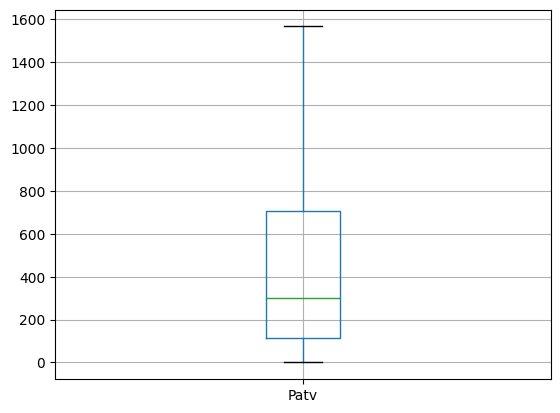

In [5]:
# create box plots for each feature
df.boxplot(column=["Patv"])

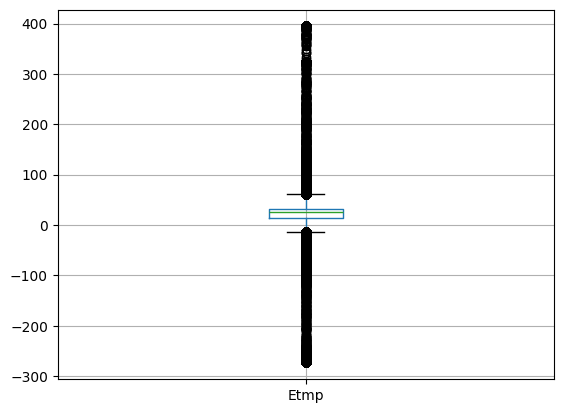

In [6]:
import matplotlib.pyplot as plt

df.boxplot(column=["Etmp"])
plt.show()

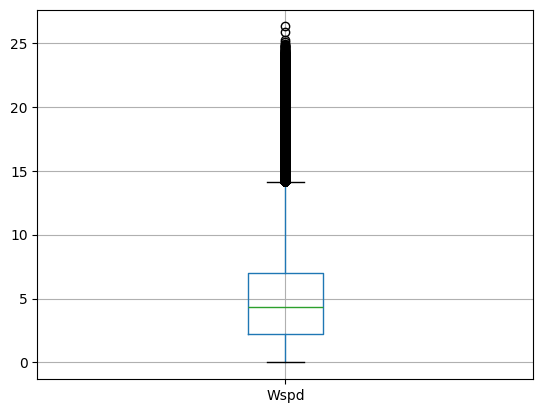

In [7]:
df.boxplot(column=["Wspd"])
plt.show()

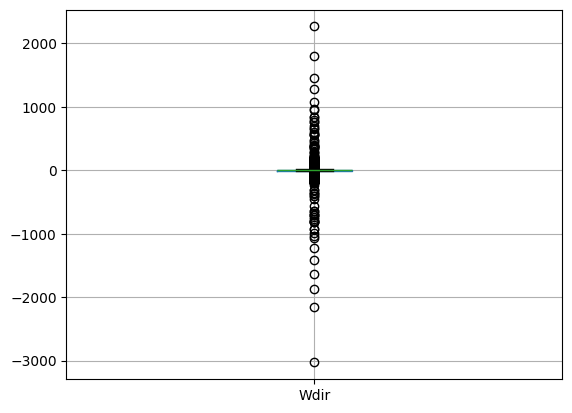

In [8]:
df.boxplot(column=["Wdir"])
plt.show()

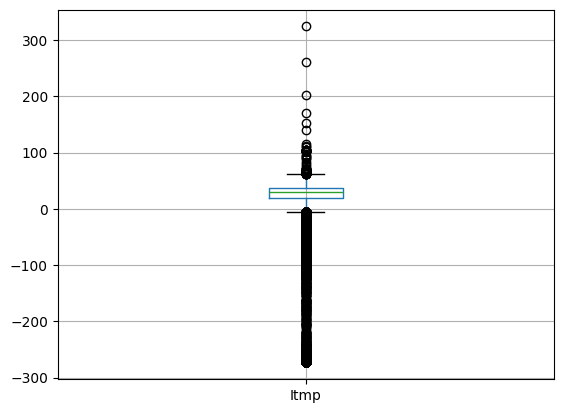

In [9]:
df.boxplot(column=["Itmp"])
plt.show()

In [10]:
df_train.head()

,TurbID,Day,time,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,timestamp,maintenance_day,turbine_stopped,turbine_at_rest,impute_day_patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 00:00:00,0,0,0,0
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,2020-05-01 00:10:00,0,0,0,0
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,2020-05-01 00:20:00,0,0,0,0
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,2020-05-01 00:30:00,0,0,0,0
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,2020-05-01 00:40:00,0,0,0,0


In [11]:
df_train.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,timestamp,maintenance_day,turbine_stopped,turbine_at_rest,impute_day_patv
count,4.129344e+06,4.129344e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,3.175920e+06,4129344,4.129344e+06,4.129344e+06,4.129344e+06,4.129344e+06
mean,6.750000e+01,1.075000e+02,5.240572e+00,5.320684e-01,4.430793e+01,3.002663e+01,1.841877e+02,2.591850e+01,2.590267e+01,2.588805e+01,-1.496043e+01,4.705688e+02,2020-08-15 23:54:59.999993344,4.672897e-03,6.902331e-02,1.971894e-01,3.312875e-03
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,0.000000e+00,2020-05-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.400000e+01,5.400000e+01,2.410000e+00,-3.780000e+00,1.877000e+01,2.428000e+01,4.909000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-4.198000e+01,1.227800e+02,2020-06-23 11:57:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.750000e+01,1.075000e+02,4.580000e+00,-2.400000e-01,2.747000e+01,3.193000e+01,1.909100e+02,6.600000e-01,6.500000e-01,6.500000e-01,-3.100000e-01,3.187700e+02,2020-08-15 23:55:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.010000e+02,1.610000e+02,7.320000e+00,3.330000e+00,3.348000e+01,3.770000e+01,3.214700e+02,7.969000e+01,7.941000e+01,7.923000e+01,-1.800000e-01,7.358900e+02,2020-10-08 11:52:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.340000e+02,2.140000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03,2020-11-30 23:50:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,3.868140e+01,6.177581e+01,3.456798e+00,3.059083e+01,8.460908e+01,1.752182e+01,1.669124e+02,3.821728e+01,3.821043e+01,3.820177e+01,7.243308e+01,4.363942e+02,NaN,6.819870e-02,2.534938e-01,3.978766e-01,5.746217e-02


In [12]:
# after handling outsliers:
df_train.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,timestamp,maintenance_day,turbine_stopped,turbine_at_rest,impute_day_patv
count,4.129344e+06,4.129344e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,4.081255e+06,3.175920e+06,4129344,4.129344e+06,4.129344e+06,4.129344e+06,4.129344e+06
mean,6.750000e+01,1.075000e+02,5.240572e+00,5.320684e-01,4.430793e+01,3.002663e+01,1.841877e+02,2.591850e+01,2.590267e+01,2.588805e+01,-1.496043e+01,4.705688e+02,2020-08-15 23:54:59.999993344,4.672897e-03,6.902331e-02,1.971894e-01,3.312875e-03
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,0.000000e+00,2020-05-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.400000e+01,5.400000e+01,2.410000e+00,-3.780000e+00,1.877000e+01,2.428000e+01,4.909000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-4.198000e+01,1.227800e+02,2020-06-23 11:57:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.750000e+01,1.075000e+02,4.580000e+00,-2.400000e-01,2.747000e+01,3.193000e+01,1.909100e+02,6.600000e-01,6.500000e-01,6.500000e-01,-3.100000e-01,3.187700e+02,2020-08-15 23:55:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.010000e+02,1.610000e+02,7.320000e+00,3.330000e+00,3.348000e+01,3.770000e+01,3.214700e+02,7.969000e+01,7.941000e+01,7.923000e+01,-1.800000e-01,7.358900e+02,2020-10-08 11:52:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.340000e+02,2.140000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03,2020-11-30 23:50:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,3.868140e+01,6.177581e+01,3.456798e+00,3.059083e+01,8.460908e+01,1.752182e+01,1.669124e+02,3.821728e+01,3.821043e+01,3.820177e+01,7.243308e+01,4.363942e+02,NaN,6.819870e-02,2.534938e-01,3.978766e-01,5.746217e-02


In [13]:
from scipy.stats import zscore


def handle_extreme_values(df_train, df_validation, features_to_check, replacement_strategy="none"):
    """
    Replace extreme values (beyond 3 standard deviations) with None or median in both training and validation sets.
    Uses training data statistics to determine thresholds.

    Args:
        df_train: Training dataframe
        df_validation: Validation dataframe
        features_to_check: List of feature names to process
        replacement_strategy: 'none', 'median'
    """

    for feature in features_to_check:
        if replacement_strategy == "none":
            replacement_value = None
        elif replacement_strategy == "median":
            replacement_value = df_train[feature].median()
        else:
            raise ValueError(f"Invalid replacement strategy: {replacement_strategy}")

        # Calculate z-scores based on training data
        train_z_scores = zscore(df_train[feature], nan_policy="omit")

        # Calculate mean and std from training data to apply to validation
        train_mean = df_train[feature].mean()
        train_std = df_train[feature].std()

        # Replace values beyond 3 standard deviations with the replacement value in training set
        df_train.loc[abs(train_z_scores) > 3, feature] = replacement_value

        # Apply same transformation to validation set using training statistics
        val_z_scores = (df_validation[feature] - train_mean) / train_std
        df_validation.loc[abs(val_z_scores) > 3, feature] = replacement_value


# Call the function with our dataframes
features_to_check = ["Etmp", "Wspd", "Wdir", "Itmp"]
handle_extreme_values(df_train, df_validation, features_to_check)

In [14]:
# after removing the outliers, replace all values over 60 degrees celsius with 60 degrees celsius
df_train.loc[df_train["Etmp"] > 60, "Etmp"] = 60
df_validation.loc[df_validation["Etmp"] > 60, "Etmp"] = 60

# replace temperare values below -50 with none
df["Etmp"] = df["Etmp"].apply(lambda x: None if x < -50 else x)

In [15]:
df_train.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4129344 entries, 0 to 4723055
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TurbID           4129344 non-null  int64         
 1   Day              4129344 non-null  int64         
 2   time             4129344 non-null  object        
 3   Wspd             4052488 non-null  float64       
 4   Wdir             3937908 non-null  float64       
 5   Etmp             3843712 non-null  float64       
 6   Itmp             4070028 non-null  float64       
 7   Ndir             4081255 non-null  float64       
 8   Pab1             4081255 non-null  float64       
 9   Pab2             4081255 non-null  float64       
 10  Pab3             4081255 non-null  float64       
 11  Prtv             4081255 non-null  float64       
 12  Patv             3175920 non-null  float64       
 13  timestamp        4129344 non-null  datetime64[ns]
 14  mainten

## Save datasets

In [16]:
# save to parquet
df_train.to_parquet("../../data/modified/sdwpf_train_214days_v1_preprocessed.parquet")
df_validation.to_parquet("../../data/modified/sdwpf_validation_31days_v1_preprocessed.parquet")